In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pdb
import pandas as pd

# all units SI (meters, kg, etc.)
distance = 7
height = 2.495
m = 0.141748
R_l = 0.0508
R_u = 0.03175
R_b = 0.0889
A = 0.0248286665
interval = 0.001
run = True

## Create Functions

In [17]:
def iterate():
    global run
    for w_r in range(30,600): #6380 falcon 500 rpm in radians/s
        for theta in range(15,85):
            if(run):
                trajectory(w_r, theta*math.pi/180)
    #print("done")
    run = True

In [18]:
def trajectory(w, theta):
    v = (w*R_l + 9/16*w*R_u)/2
    #print(v)
    s = (w*R_l - 9/16*w*R_u)/(2*math.pi*R_b)
    runPath(w,v,s,theta)

In [19]:
def runPath(w,v_i,s,theta_i):
    v_x = v_i*math.cos(theta_i)
    v_y = v_i*math.sin(theta_i)
    theta = theta_i
    x_dist = 0
    y_dist = 0
    through = True
    x = [0]
    y = [0]
    while(through):
        x_dist += v_x*interval
        y_dist += v_y*interval
        x.append(x_dist)
        y.append(y_dist)
        v_n = math.sqrt(v_x*v_x + v_y*v_y)
        theta = angle(v_x,v_y)
     
        magnus = magnusF(s, v_n)
        drag = dragF(v_n)
        v_x -= (magnus*math.sin(theta) + drag*math.cos(theta))*interval
        v_y -= (drag*math.sin(theta) + 9.8 - magnus*math.cos(theta))*interval
        
        if(v_y < 0.1 and v_y > -0.1):
            if(((x_dist > distance - .01) and (x_dist < distance + .01)) 
            and ((y_dist > height - .015) and (y_dist < height + .015))):
                through = False
                global w_min
                plt.plot(x,y)
                omega_array.append(round(w*60/(2*math.pi),2))
                theta_array.append(round(theta_i*180/math.pi,2))
                print ("w: " + str(w*60/(2*math.pi)) + " a: " + str(theta_i*180/math.pi))
                global run
                run = False
  
        if(v_y < -0.15):
            through = False
      

In [20]:
def magnusF(s,v):
    return (0.1)*(16/3)*(math.pi*math.pi)*1.225*(R_b**3)*s*v/m
def dragF(v):
    return (0.47)*(1.225/2)*A*(v**2)/m
def angle(x,y):
    return math.atan(y/x)

1 , 2.3
w: 2263.1832907667517 a: 59.0
2 , 2.3939999999999997
w: 2272.7325873522655 a: 58.0
3 , 2.488
w: 2291.831180523293 a: 57.0
4 , 2.582
w: 2310.9297736943204 a: 56.0
5 , 2.6759999999999997
w: 2330.028366865348 a: 55.0
6 , 2.7699999999999996
w: 2349.1269600363753 a: 54.0
7 , 2.864
8 , 2.9579999999999997
w: 2377.7748497929165 a: 53.0
9 , 3.0519999999999996
w: 2396.873442963944 a: 52.00000000000001
10 , 3.146
w: 2425.521332720485 a: 51.0
11 , 3.2399999999999998
w: 2444.6199258915126 a: 50.0
12 , 3.3339999999999996
w: 2473.267815648054 a: 49.0
13 , 3.428
w: 2473.267815648054 a: 49.0
14 , 3.522
w: 2501.915705404595 a: 48.0
15 , 3.6159999999999997
w: 2521.0142985756224 a: 47.0
16 , 3.71
w: 2549.662188332163 a: 46.0
17 , 3.804
w: 2549.662188332163 a: 46.0
18 , 3.8979999999999997
w: 2587.859374674218 a: 45.0
19 , 3.992
w: 2616.5072644307593 a: 43.99999999999999
20 , 4.086
w: 2616.5072644307593 a: 43.99999999999999
21 , 4.18
w: 2645.1551541873005 a: 43.0
22 , 4.274
w: 2683.3523405293554 a: 

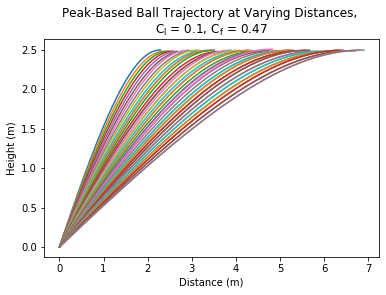

In [21]:
plt.title("Peak-Based Ball Trajectory at Varying Distances, \n$C_l$ = 0.1, $C_f$ = 0.47")
plt.xlabel("Distance (m)")
plt.ylabel("Height (m)")

plt.rcParams.update({'mathtext.default':  'regular' })

trial_array = []
distance_array = []
omega_array = []
theta_array = []
max_trials = 50

for i in range(0,max_trials):
    trial_array.append(i+1)
    distance = 2.3 + ((7-2.3) / max_trials)*i
    distance_array.append(distance)
    print(str(i+1) + " , " + str(distance))
    iterate()

plt.savefig("peak_based_" + str(max_trials) + "_trials.png")
plt.show()

In [25]:
print(len(trial_array))
print(len(distance_array))
print(len(omega_array))
print(len(theta_array))

48
48
48
48


In [24]:
distance_array.remove(6.53)
distance_array.remove(6.624)

## Test

In [26]:
def make_bold(val):
    bold = 'bold'
    
    return 'font-weight: %s' % bold

df = pd.DataFrame(data = {'Trial': trial_array, 
                          'Distance': distance_array, 
                          'Angular Velocity': omega_array, 
                          'Angle': theta_array})
print(df)
df.to_csv("peak_based_" + str(max_trials) + "_trials.csv")

    Trial  Distance  Angular Velocity  Angle
0       1     2.300           2263.18   59.0
1       2     2.394           2272.73   58.0
2       3     2.488           2291.83   57.0
3       4     2.582           2310.93   56.0
4       5     2.676           2330.03   55.0
5       6     2.770           2349.13   54.0
6       7     2.864           2377.77   53.0
7       8     2.958           2396.87   52.0
8       9     3.052           2425.52   51.0
9      10     3.146           2444.62   50.0
10     11     3.240           2473.27   49.0
11     12     3.334           2473.27   49.0
12     13     3.428           2501.92   48.0
13     14     3.522           2521.01   47.0
14     15     3.616           2549.66   46.0
15     16     3.710           2549.66   46.0
16     17     3.804           2587.86   45.0
17     18     3.898           2616.51   44.0
18     19     3.992           2616.51   44.0
19     20     4.086           2645.16   43.0
20     21     4.180           2683.35   42.0
21     22 